# Vecteurs

Le vecteur se trace avec `quiver()` de`matplotlib`.

> Documentation officielle : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.quiver.html

L'écriture du vecteur se fera de cette façon :
```python
quiver(x,y,vecteurx,vecteury)
```

Exemple : 


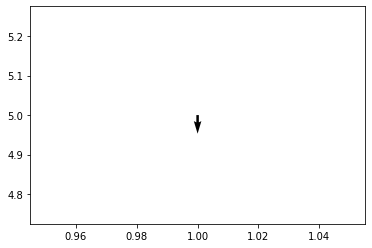

In [1]:
import sys
# nécessaire pour le notebook, à commenter sinon
!{sys.executable} -m pip install matplotlib numpy 
import matplotlib.pyplot as plt

x=1 #position du vecteur en x
y=5 # positon en y
vectx=0 #longueur du vecteur sur l'axe des x
vecty=-9.81 #longueur sur l'axe des y
plt.quiver(x,y,vectx,vecty)
plt.show()

Cependant, on préféra noter :
```python
vecteurs = plt.quiver(x,y,vectx,vecty)
```

Pour tracer plusieurs vecteurs, on pourra fournir une liste de valeurs : 

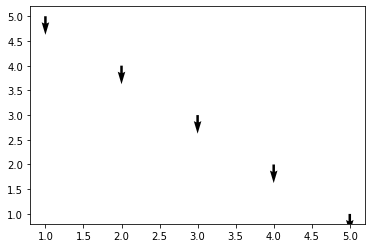

In [2]:
x=[1,2,3,4,5]
y=[5,4,3,2,1]
vectx=0
vecty=-9.81
plt.quiver(x,y,vectx,vecty)
plt.show()

> On remarquera qu'ici les x et y sont des listes, et les vecteurs eux ne le sont pas. Dans ce cas les mêmes valeurs sont prises pour chaque vecteur.

## Échelle de vecteur

L'échelle se configure via l'option `scale=X` (X est un nombre).
Plus le nombre est grand, plus le vecteur apparait petit.
Le nombre indiqué correspond au nombre d'unités par vecteur. Si le vecteur doit représenter 10 graduations et que vous indiquez scale=10; votre vecteur occupera toute la longueur.

Exemple : Je veux représenter l'accélération de la pesanteur par un vecteur à un point. Son intensité est de 9.81. Si le vecteur doit occuper 1/10 de la figure, on indiquera "scale = 98.1" (on retrouve la notation des échelle 1:10 soit ici 9.81:98.1

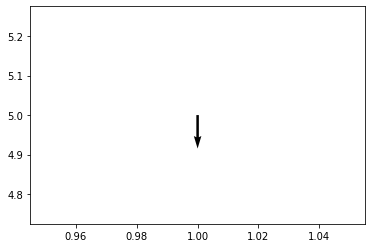

In [11]:
x=[1]
y=[5]
vectx=0
vecty=-9.81
plt.quiver(x,y,vectx,vecty, scale=98.1)
plt.show()

## Légende

La légende s'ajoute avec `quiverkey`

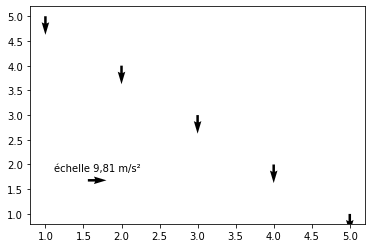

In [12]:
x=[1,2,3,4,5]
y=[5,4,3,2,1]
vectx=0
vecty=-9.81
vecteur = plt.quiver(x,y,vectx,vecty)
plt.quiverkey(vecteur,0.2,0.2,9.81,label='échelle 9,81 m/s²')
plt.show()

**Options intéressantes**
`coordinates = 'figure'` : permet de prendre la fenetre et non pas le graphique comme référence pour le placement de la légende. Donc de placer la légende hors du graphique.
Les positions X et Y vont de 0 (tout à gauche ou bas) à 1 (tout à droit ou en haut). "0.5" correspond donc au milieu.
Exemple : `plt.quiverkey(vecteur,0.5,0.95,...,coordinates = 'figure')` place la légende en haut / milieu de la fenetre.

## Quelques options :
- `plt.axis('equal')` : Pour avoir un repère orthonormé
- `plt.xlim(0,10)` : Configure les valeurs limites sur l'abscisse
- `plt.ylim(0,6)` : Idem sur l'axe des ordonnées

## Exercice

Voici l'exercice chute d'une balle. 

En s'inspirant de ce qui est fait, trace les graphiques représentant les accélérations (ax, ay, et a)

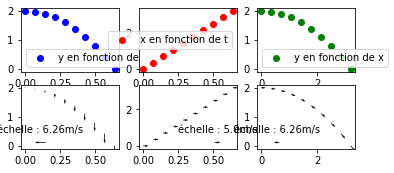

In [13]:
#Exercice chute balle

#Import lib
import numpy as np
import matplotlib.pyplot as plt

#Configuration départ
x0 = 0
y0 = 2
vx0 = 5
vy0 = 0
ax0 = 0
ay0 = -9.81

#
tmax = (abs(2*y0/ay0))**0.5
t = np.linspace(0,tmax,10)

#calcule des valeurs
def y(t,ay0=ay0,vy0=vy0,y0=y0):
    return 0.5*(ay0*t**2)+vy0*t+y0

def x(t,ax0=ax0,vx0=vx0,x0=x0):
    return 0.5*(ax0*t**2)+vx0*t+x0

def vy(t,ay0=ay0,vy0=vy0):
    return ay0*t + vy0

def vx(t,ax0=ax0,vx0=vx0):
    return ax0*t + vx0



fenetre1 = plt.figure('Fenetre 1')
#Position
graphy = fenetre1.add_subplot(331)
graphy.plot(t,y(t),'ob',label = 'y en fonction de t') #affiche les points de position y en fonction de t

graphx = fenetre1.add_subplot(332)
graphx.plot(t,x(t),'or',label = 'x en fonction de t') #affiche les points de position x en fonction de t

graphxy = fenetre1.add_subplot(333)
graphxy.plot(x(t),y(t),'og',label = 'y en fonction de x') #affiche les points de position y en fonction de x

#Vitesse
graphvy = fenetre1.add_subplot(334)
vecteury = graphvy.quiver(t,y(t),0,vy(t),label = 'vy en fonction de t')
graphvy.quiverkey(vecteury,0.2,0.1,vy(tmax),label='échelle : '+str(abs(round(vy(tmax),2)))+'m/s')

graphvx = fenetre1.add_subplot(335)
vecteurx = graphvx.quiver(t,x(t),vx(t),0,label = 'vx en fonction de t')
graphvx.quiverkey(vecteurx,0.8,0.1,vx(tmax),label='échelle : '+str(round(vx(tmax),2))+'m/s')

graphvxy = fenetre1.add_subplot(336)
vecteurxy = graphvxy.quiver(x(t),y(t),vx(t),vy(t),label = 'v en fonction de x')
graphvxy.quiverkey(vecteurxy,0.2,0.1,vy(tmax),label='échelle : '+str(abs(round(vy(tmax),2)))+'m/s')


#Accélérations


#Affichage des legendes
graphx.legend(),graphy.legend(),graphxy.legend()

#Tracer du graphique
plt.show()

Vous devez obtenir quelque chose du genre : 

![caption](https://physique-chimie.dis.ac-guyane.fr/sites/physique-chimie.dis.ac-guyane.fr/IMG/png/fenetre_1.png)